# Tutorial 1.1 - ODE Solution of a Bimolecular Reaction

### We start off by examining a simple bimolecular reaction system considering the traditional continuous, deterministic solution to the ODE.

In [1]:
# Import Standard Python Libraries
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
# Import Custom Analysis and Plotting Modules
import sys
sys.path.append('../analyze_scripts')
import custom_plot as plot

In [3]:
# Constants
V  = 1.0e-15    # L
NA = 6.022e23   # molecules/mole
tstart =  0.0   # s
tend   = 30.0   # s

In [4]:
# Rates in terms of molecules and seconds
fold = 1 # multiply the rate constant by fold
kf=1.07e6 *fold  # /Molar/s
kr=0.351  *fold  # /s

In [5]:
# Initial Species Concentrations
A  = 50/(NA*V) # Molar
B  = 50/(NA*V) # Molar
C  = 0/(NA*V)    # Molar
S0 = [A, B, C]

<h2> Reaction System </h2>
<h3> Reaction Form </h3>
<br/>

$$
A + B \xrightarrow{k_f} C
$$

$$
C \xrightarrow{k_r} A + B
$$


<h3> Rate Form </h3>
<br/>

$$
\frac{dA}{dt} = \frac{dB}{dt} = -\frac{dC}{dt} = -k_f\cdot  A\cdot B + k_r\cdot  C
$$

In [6]:
# Definition of ODEs
def ds_dt(s, t):
    Ai = s[0]
    Bi = s[1]
    Ci = s[2]
    # Rate equations
    dA_dt = -kf*Ai*Bi + kr*Ci
    dB_dt = -kf*Ai*Bi + kr*Ci
    dC_dt =  kf*Ai*Bi - kr*Ci
    return [dA_dt, dB_dt, dC_dt]

## Solve using SciPy ODE Integrator
    
See the [Scipy Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

In [7]:
# Solve
t    = np.linspace(tstart, tend, 1000000)
soln = spi.odeint(ds_dt, S0, t)

### Plot the Count

Import user written python scripts `../analyze_scripts/custom_plot.py` for more beautiful plots. Function `plot_time_ranges` plots the time-depedent traces with showing the average and span. If you are curious about plotting with Matplotlib, see the [Matplotlib Documentation](https://matplotlib.org/stable/api/pyplot_summary.html)

In [8]:
# Create folder to store plotted figures
fig_dir = './plots_bimolecule/'

if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

Please go to `fig_dir` in the web server to see the figure

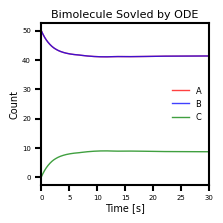

In [11]:
#fig_path = fig_dir + fig_name + extension

fig_name = 'bimolecule_ODE_{0}foldrate.png'.format(fold)
fig_size = [7/3, 7/3] # Length by Height in inches
time = t
data_list=[NA*V*soln[:,0:1], NA*V*soln[:,1:2], NA*V*soln[:,2:3]]
legends = ['A','B','C']
colors = ['red', 'blue', 'green']
xlabel='Time [s]'
ylabel='Count'
title='Bimolecule Sovled by ODE'
percentile = [0,100]

plot.plot_time_ranges(fig_dir, fig_name, fig_size,
               time, data_list, legends, colors, xlabel, ylabel, title,
               percentile, plot_avg=True, plot_range=False, xlimit=[tstart, tend],
               title_set=True, fonts_sizes=[7, 7, 8, 6],
               extension='.png', tick_setting=[4.0, 1.5, 5, 'out'],
               legend_pos='best')